**Question 1**


(a) Simple moving average: The moving average (MA) is a simple technical analysis tool that smooths out data by creating a constantly updated average data. Moving averages smooth the given data by creating a constantly updated average price over a specified period of time. The two most popular types of moving averages are the Simple Moving Average (SMA) and the Exponential Moving Average (EMA). Here we are considering simple moving average (SMA).By calculating the moving average, the impacts of random, short-term fluctuations on the data for e.g. price of a stock over a specified time-frame are mitigated.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
%matplotlib inline
from matplotlib.pyplot import figure

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
#Read the data
rain_data = pd.read_csv('/content/data-DS.csv')
rain_data.head()

,year,rain
0,1907,269
1,1908,321
2,1909,585
3,1910,871
4,1911,1475


In [ ]:
#check the length of the data
len(rain_data)

114

In [ ]:
#check for null values
rain_data.isnull().sum()

year    0
rain    0
dtype: int64

In [ ]:
#Convert the data into a time series format
raindata_ts = pd.read_csv('/content/data-DS.csv', na_values = ['null'], index_col = 'year', parse_dates=True, infer_datetime_format=True)


In [ ]:
raindata_ts.head()

,rain
year,
1907-01-01,269
1908-01-01,321
1909-01-01,585
1910-01-01,871
1911-01-01,1475


In [ ]:
#rolling sd and simple moving average
def plot_rolling(timeseries, window):
  rol_mean = timeseries.rolling(window).mean()
  rol_std = timeseries.rolling(window).std()

  fig = plt.figure(figsize=(12,4))
  og = plt.plot(timeseries, color='blue', label='Original')
  mean = plt.plot(rol_mean, color='red', label='Rolling mean')
  std = plt.plot(rol_std, color='black', label = 'Rolling S.D.')
  plt.legend(loc = 'best')
  plt.title("Moving Average and S.D. (Window = {}) for the Rain Data".format(window))
  plt.show()

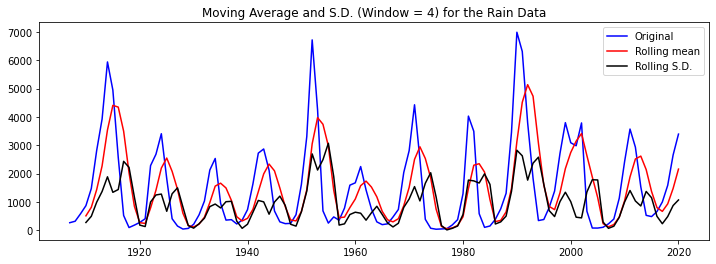

In [ ]:
plot_rolling(raindata_ts, 4)

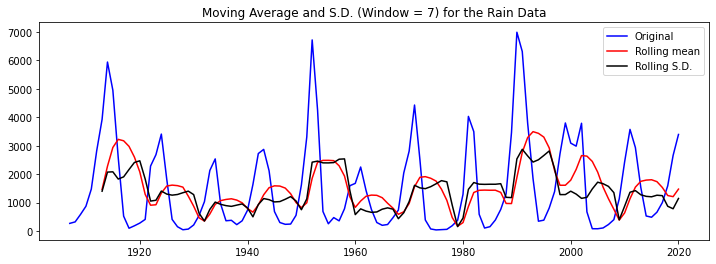

In [ ]:
plot_rolling(raindata_ts, 7)

As the rolling window increases, the curve becomes more sharp and deviates more from the actual value. However, when the rolling window decreases the rolling mean and standard deviation fits more to the actual data.

(b) Seasonal Decomposition

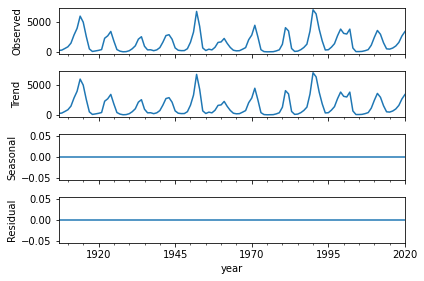

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
decom_ts = seasonal_decompose(raindata_ts)
decom_plot = decom_ts.plot()

The time series consists of three components: Trend, seasonality and error or random components. The trend is the component of a time series that represents variations of low frequency in a time series, the high and medium frequency fluctuations having been filtered out. Seasonality is the presence of variations that occur at specific regular intervals less than a year, such as weekly, monthly, or quarterly. The error component is highly random in nature and is quite difficult to predict.

(c) Calculate the mean and standard deviation of trend series, and seasonal series

In [ ]:
print('Mean of trend series:', decom_ts.trend.mean())
print('Standard deviation of trend series:', decom_ts.trend.std())
print('Mean of seasonal series:', decom_ts.seasonal.mean())
print('Standard deviation of seasonal series:', decom_ts.seasonal.std())

Mean of trend series: rain    1538.017544
dtype: float64
Standard deviation of trend series: rain    1585.843914
dtype: float64
Mean of seasonal series: rain    1.0
dtype: float64
Standard deviation of seasonal series: rain    0.0
dtype: float64


(d) Generate a de-seasonal series and plot it separately.

In [ ]:
!pip install stldecompose

In [ ]:
from stldecompose import decompose

In [ ]:

ts_stl = decompose(raindata_ts, period=12)
ts_stl.seasonal.head()

,rain
year,
1907-01-01,-306.546913
1908-01-01,-475.379815
1909-01-01,-242.738980
1910-01-01,-49.699302
1911-01-01,-42.910466


<Figure size 864x432 with 0 Axes>

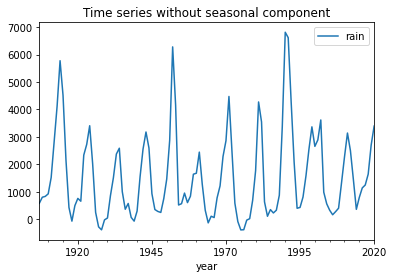

<Figure size 864x432 with 0 Axes>

In [ ]:
without_seasonal = raindata_ts- ts_stl.seasonal
without_seasonal.plot()
plt.title('Time series without seasonal component')
plt.figure(figsize=(12,6))


The plot without seasonality element consists of only trend and error terms. A clear trend has not been observed in the observed plot.

(e) Forecast the future values

In [ ]:
from stldecompose import decompose, forecast
from stldecompose.forecast_funcs import (naive, drift, mean, seasonal_naive)
ts_stl = decompose(raindata_ts, period=12)
ts_f = forecast(ts_stl, steps = 15, fc_func = seasonal_naive, seasonal=True)

In [ ]:
ts_f

,seasonal_naive+seasonal
2020-12-31,1478.126597
2021-12-31,1846.742382
2022-12-31,2129.755974
2023-12-31,2144.873181
2024-12-30,1816.821699
2025-12-30,1904.504733
2026-12-30,1436.325423
2027-12-30,1195.161978
2028-12-29,1440.204743
2029-12-29,1645.479854


Steps to generate a forecast:
1. Read the data.
2. Handling null or missing values.
3. Convert the data into a time series data.
4. Decompose the time series data
5. Check the stationarity
6. Forecast

**Extra**
Different Types of Forecast Methods for a Timeseries Data

1. A simple moving average (SMA) is the simplest type of technique of forecasting. Basically, a simple moving average is calculated by adding up the last 'n' period's values and then dividing that number by 'n'. So the moving average value is considering as the forecast for next period.

2. Exponential smoothing is usually a way of “smoothing” out the data by removing much of the “noise” (random effect) from the data by giving a better forecast. 
Simple exponential smoothing: If you have a time series that can be described using an additive model with constant level and no seasonality, you can use simple exponential smoothing to make short-term forecast. 
Holt’s Exponential Smoothing: If you have a time series that can be described using an additive model with increasing or decreasing trend and no seasonality, you can use Holt’s exponential smoothing to make short-term forecasts.

3. Autoregressive Integrated Moving Average (ARIMA): A statistical technique that uses time series data to predict future. The parameters used in the ARIMA is (P, d, q) which refers to the autoregressive, integrated and moving average parts of the data set, respectively. ARIMA modeling will take care of trends, seasonality, cycles, errors and non-stationary aspects of a data set when making forecasts. ARIMA checks stationarity availability in the data, the data should also show a constant variance in its fluctuations over time. To get the proper information about the parameter used in ARIMA is based on “identification process” which was purposed by Box-Jenkins.

**Question 2**

(a) The ACF plot is a bar chart of the coefficients of correlation between a time series and lags of itself. The PACF plot is a plot of the partial correlation coefficients between the series and lags of itself.

The hypothesis of ACF is that there is no correlation between a time series and lags of itself. The hypothesis for PACF is that there is no partial correlation coefficients between the series and lags of itself. 

Relevance: We find optimum features or order of the AR process using the PACF plot, as it removes variations explained by earlier lags so we get only the relevant features. We find optimum features or order of the MA process using the ACF plot, as being an MA process it doesn’t have seasonal and trend components so we get only the residual relationship with the lags of time series in the ACF plot. ACF acting as a partial plot.



(b) Percentage change of time series data: Percent of change is a comparison between two values expressed in hundredths. A negative percent of change indicates a decrease from the original value to the second value. A positive percent of change indicates an increase from the original value to the second value.


In [ ]:
#percentage change with an interval of one period in the time series data 
pct_data = raindata_ts.pct_change(periods=1)
pct_data.head()

,rain,WN_rain
year,,
1907-01-01,NaN,NaN
1908-01-01,0.193309,0.062285
1909-01-01,0.822430,-0.645828
1910-01-01,0.488889,-0.521989
1911-01-01,0.693456,5.585429


In [ ]:
#Remove the null value of the first column
pct_data = pct_data.iloc[1:,:]
pct_data.head()

,rain,WN_rain
year,,
1908-01-01,0.193309,0.062285
1909-01-01,0.822430,-0.645828
1910-01-01,0.488889,-0.521989
1911-01-01,0.693456,5.585429
1912-01-01,0.912542,-0.078380


Normalized data: White noise series has a mean 0 and constant variance. Also, it has zero autocovariance and autocorrelation.

In [ ]:
from matplotlib.pyplot import figure
import statsmodels.graphics.tsaplots as sgt
import statsmodels.tsa.stattools as sts
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose

In [ ]:
#Remove white noise series from each variable 
#We create white noise of variable by considering the mean (central tendency) and S.D. (how much each data point deviates from centre)
white_noise = np.random.normal(loc = raindata_ts.rain.mean(), scale = raindata_ts.rain.std(), size = len(raindata_ts))
raindata_ts['WN_rain'] = white_noise

In [ ]:
raindata_ts.head()

,rain,WN_rain
year,,
1907-01-01,269,3282.818674
1908-01-01,321,3487.290060
1909-01-01,585,1235.101317
1910-01-01,871,590.391443
1911-01-01,1475,3887.981168


(c) ACF and PACF plots

ACF plots

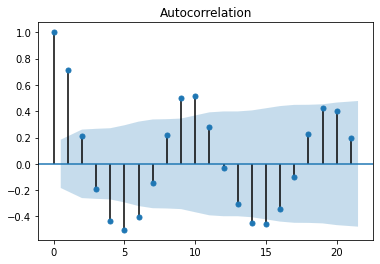

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(raindata_ts['rain'])
plt.title('ACF for orginal data')
plt.show()

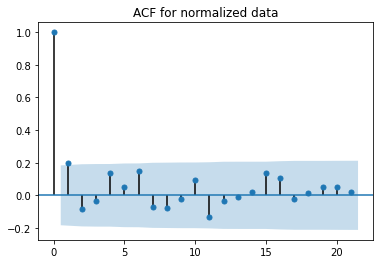

In [ ]:
plot_acf(raindata_ts['WN_rain'])
plt.title('ACF for normalized data')
plt.show()

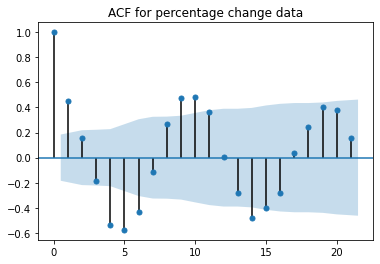

In [ ]:
plot_acf(pct_data['rain'])
plt.title('ACF for percentage change data')
plt.show()

The ACF plot for white noise/normalized data suggests that it is a zero order MA process. The ACF plot for percentage change data is order 10 MA. However, the ACF plot for orginal data suggests that MA of order 10 is the highest order that is signficant.

Plot PACF

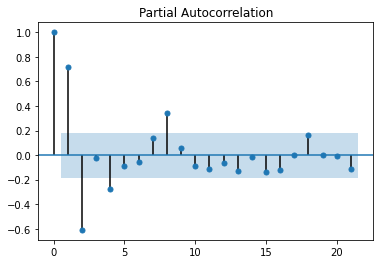

In [ ]:
#for original data
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(raindata_ts['rain'])
plt.show()

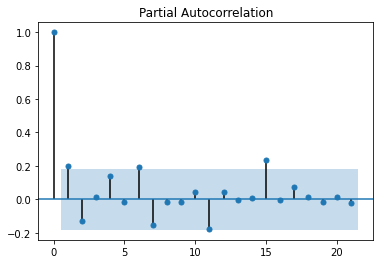

In [ ]:
#for normalized data
plot_pacf(raindata_ts['WN_rain'])
plt.show()

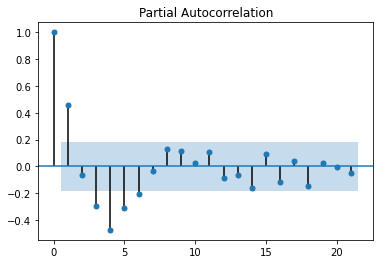

In [ ]:
#for percentage change data
plot_pacf(pct_data['rain'])
plt.show()

From PACF plots, we conclude that the AR was found to be of 0 order for normalized data and percentage change data. The AR of order 15 was found to be signficant for the original and the percentage change dataset. 

(d) ADF testf or stationarity.
Null Hypothesis: Not stationary (unit root)
Alternate Hypothesis : Stationary

In [ ]:
#for original data
sts.adfuller(raindata_ts.rain)

(-2.996303675142558,
 0.03524103535901374,
 7,
 106,
 {'1%': -3.4936021509366793,
  '10%': -2.58153320754717,
  '5%': -2.8892174239808703},
 1635.975223662428)

In [ ]:
#for normalized data
sts.adfuller(raindata_ts.WN_rain)

(-7.611339229195942,
 2.2509134549835867e-11,
 1,
 112,
 {'1%': -3.4901313156261384,
  '10%': -2.5807296460459184,
  '5%': -2.8877122815688776},
 1774.082488357951)

In [ ]:
#for percent change data
sts.adfuller(pct_data.rain)

(-8.032506526506944,
 1.9413286947885083e-12,
 5,
 107,
 {'1%': -3.492995948509562,
  '10%': -2.58139291903223,
  '5%': -2.888954648057252},
 211.46041537868268)

The second value is probability which if greater than 0.05 we reject null hypothesis. If the Z-statistic (first value) is greater than absolute values (1%, 10%, 5%). The last value is AIC. After probability we have lag (1) and degree of freedom (no. of obs - no.parameters = 361-2 = 359)

Since the probability values are greater than 0.05 for the normalized data and the percent change data therefore it could be suggested that both the series are of stationary nature. However, the probability value is less than 0.05 for the original data and therefore it could be suggested that the original time series is non-stationary in nature.